<a href="https://colab.research.google.com/github/pedrogfsilva/Ponderada-Lunar-Lander/blob/main/Ponderada_Lunar_Lander_Pedro_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instalando dependências
!pip install gymnasium
!pip install swig
!pip install gymnasium[box2d]

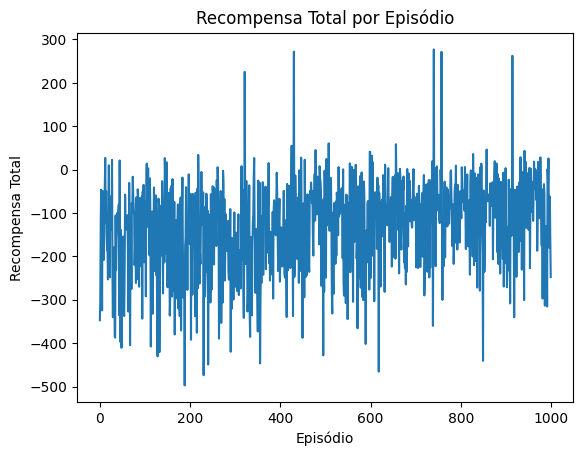

In [ ]:
# importando dependências
import gym
import numpy as np
import matplotlib.pyplot as plt

# criando o ambiente Lunar Lander
env = gym.make('LunarLander-v2')

# parâmetros do Q-Learning
num_episodes = 1000
learning_rate = 0.1
discount_factor = 0.99
exploration_rate = 0.1
num_bins = 10  # número de bins para cada dimensão do espaço de estados

# discretizando o espaço de estados
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds[1] = (-1, 1)  # limites para a velocidade no eixo Y
state_bounds[3] = (-1, 1)  # limites para a velocidade angular
bins = [np.linspace(bound[0], bound[1], num_bins) for bound in state_bounds]

# função para discretizar estados
def discretize_state(state):
    discretized = []
    for i in range(len(state)):
        index = np.digitize(state[i], bins[i])
        # ajuste para garantir que o índice esteja dentro dos limites válidos
        if index == num_bins:
            index -= 1
        discretized.append(index)
    return tuple(discretized)

# inicializando a tabela Q com zeros
Q = np.zeros([num_bins] * len(state_bounds) + [env.action_space.n])

# função de exploração (epsilon-greedy)
def choose_action(state, exploration_rate):
    if np.random.rand() < exploration_rate:
        return env.action_space.sample()  # ação aleatória
    else:
        return np.argmax(Q[state])

# treinamento do agente
rewards_per_episode = []
for episode in range(num_episodes):
    state = discretize_state(env.reset())
    total_reward = 0

    while True:
        action = choose_action(state, exploration_rate)
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state)

        # atualizando a tabela Q usando a equação de Bellman
        Q[state + (action,)] = (1 - learning_rate) * Q[state + (action,)] + \
                               learning_rate * (reward + discount_factor * np.max(Q[next_state]))

        state = next_state
        total_reward += reward

        if done:
            break

    rewards_per_episode.append(total_reward)

# plot dos resultados
plt.plot(rewards_per_episode)
plt.xlabel('Episódio')
plt.ylabel('Recompensa Total')
plt.title('Recompensa Total por Episódio')
plt.show()